In [1]:
import argparse
import os
import sys
import tabulate
import time
import torch
import torch.nn.functional as F

import curves
import data
import models
import utils
import pickle

import copy
import torchvision

In [2]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

from scipy.stats import norm

In [3]:
architecture = getattr(models, "VGG16")

In [4]:
model = architecture.base(num_classes=10, **architecture.kwargs)
model2 = architecture.base(num_classes=10, **architecture.kwargs)
model3 = architecture.base(num_classes=10, **architecture.kwargs)

In [5]:
loaders, num_classes = data.loaders(
    "CIFAR10",
    "data",
    128,
    1,
    "VGG",
    False
)

Files already downloaded and verified
Using train (45000) + validation (5000)
Files already downloaded and verified


In [21]:
model.load_state_dict(torch.load("curves/curve54/checkpoint-100.pt")['model_state'])
model2.load_state_dict(torch.load("curves/curve54/checkpoint-100.pt")['model_state'])

In [22]:
list(model.modules())[-3].weight.shape

torch.Size([512, 512])

In [23]:
def change_node(l1, l2, i, j):
    #   matrix
    c = copy.deepcopy(torch.nn.Parameter(list(model.modules())[l1].weight[j]))
    list(model.modules())[l1].weight[j] = list(model.modules())[l1].weight[i]
    list(model.modules())[l1].weight[i] = c

    #     bias
    c = copy.deepcopy(torch.nn.Parameter(list(model.modules())[l1].bias[j]))
    list(model.modules())[l1].bias[j] = list(model.modules())[l1].bias[i]
    list(model.modules())[l1].bias[i] = c

    c = copy.deepcopy(torch.nn.Parameter(list(model.modules())[l2].weight.transpose(0, 1)[j]))
    list(model.modules())[l2].weight.transpose(0, 1)[j] = list(model.modules())[l2].weight.transpose(0, 1)[i]
    list(model.modules())[l2].weight.transpose(0, 1)[i] = c

In [24]:
for i in range(256):
    change_node(-6, -3, i, i+256)

In [25]:
for p1, p2, p3 in zip(model3.parameters(), model2.parameters(), model.parameters()):
    p1.data.copy_(0.5*(p2+p3))

In [26]:
l1 = -6
W1 = list(model2.modules())[l1].weight.data.numpy()
W2 = list(model3.modules())[l1].weight.data.numpy()

In [27]:
# list(model.modules())[-1].weight.shape

In [28]:
# j1 = 5
# j2 = 1
# l1 = -6 
# l2 = -6 
# EW1 = []
# EW2 = []
# EW1W2 = []
# for m in range(50, 51):
#     model.load_state_dict(torch.load("curves/curve"+str(m)+"/checkpoint-100.pt")['model_state'])
#     E = 0
#     for i in range(512):
#         E+=list(model.modules())[l1].weight[i][j1]
#     EW1.append(float(E))
#     E = 0
#     for i in range(512):
#         E+=list(model.modules())[l2].weight[j2][i]
#     EW2.append(float(E))
#     E = 0
#     for i in range(512):
#         E+=list(model.modules())[l1].weight[i][j1]*list(model.modules())[l2].weight[j2][i]
#     EW1W2.append(float(E))
    

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs
from sklearn.manifold import  TSNE
from pandas.tools.plotting import parallel_coordinates

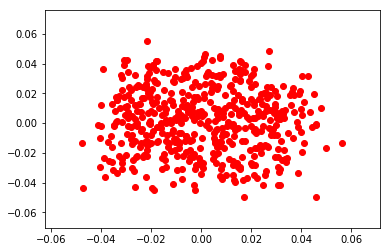

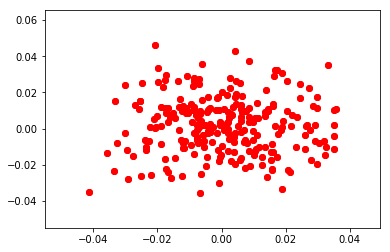

In [31]:
i, j = 0, 1
plt.scatter(W1[:, i], W1[:, j], c='red')
plt.show()
plt.scatter(W2[:, i], W2[:, j], c='red')
plt.show()

# pca = sklearnPCA(n_components=2) #2-dimensional PCA
# transformed = pca.fit_transform(W1)

# plt.scatter(transformed[:, 0], transformed[:, 1], c='red')
# plt.show()

# pca = sklearnPCA(n_components=2) #2-dimensional PCA
# transformed = pca.fit_transform(W2)

# plt.scatter(transformed[:, 0], transformed[:, 1], c='red')
# plt.show()

# tsne = TSNE(n_components=2) 
# tsne_transformed = tsne.fit_transform(W1)

# plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c='red')
# plt.show()

# tsne = TSNE(n_components=2) 
# tsne_transformed = tsne.fit_transform(W2)

# plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c='red')
# plt.show()

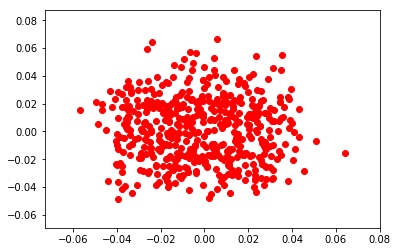

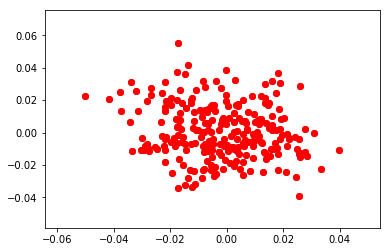

In [20]:
i, j = 0, 1
plt.scatter(W1[:, i], W1[:, j], c='red')
plt.show()
plt.scatter(W2[:, i], W2[:, j], c='red')
plt.show()

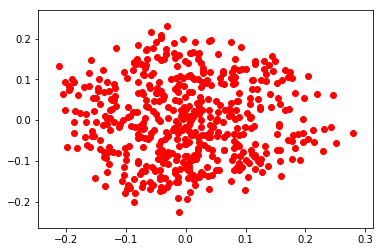

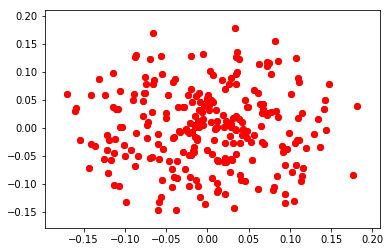

In [17]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pca.fit_transform(W1)

plt.scatter(transformed[:, 0], transformed[:, 1], c='red')
plt.show()

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pca.fit_transform(W2)

plt.scatter(transformed[:, 0], transformed[:, 1], c='red')
plt.show()

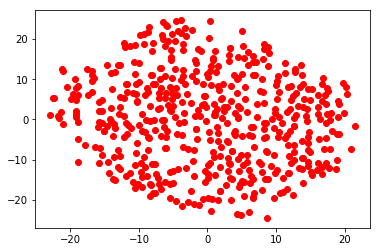

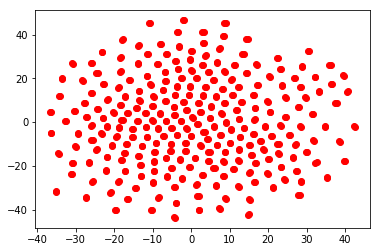

In [19]:
tsne = TSNE(n_components=2) 
tsne_transformed = tsne.fit_transform(W1)

plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c='red')
plt.show()

tsne = TSNE(n_components=2) 
tsne_transformed = tsne.fit_transform(W2)

plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c='red')
plt.show()

In [31]:
def plot_stat(x, bins=5, name = None):

    mu, std = norm.fit(x)

    # Plot the histogram.
    plt.hist(x, bins=bins, alpha=0.6,density=True, color='g')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "mu = %.2f,  std = %.2f, N = %.f" % (mu, std, 50)
    plt.title(title)

    plt.show()

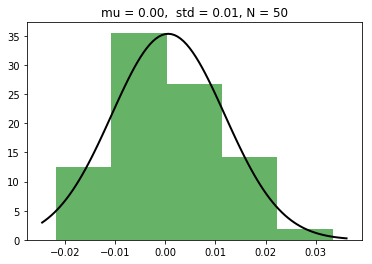

In [34]:
plot_stat(EW1W2, bins=5);

In [ ]:
plot_stat

In [ ]:
EW2[h]

In [17]:
for h in range(0, 50):
    print((EW1[h]*EW2[h]-EW1W2[h]))

0.015104583948243766
-0.5175359897767109
0.0744774918795934
0.4367555554509295
-0.0039547520172744655
-0.05770887935486613
-0.12119744142486333
0.0621155720853781
0.41235299889188326
-0.15122598760313188
0.7622398440528713
-0.27584200404018944
-0.061237517302743516
0.16408929936315353
0.09196880625591142
-0.04925511898610502
0.08418652178342256
0.04748972648594929
-0.43505827437213185
0.09962990644831571
-0.1612104617317165
0.1774061997879901
0.07480459408019424
-0.2957610490872824
0.8085829810165279
-0.09103153241656248
0.916645431679143
0.1424226841811187
-0.8301298037597071
-0.086426922107945
-0.24167672077177293
-0.42508424988690763
0.7937531022430875
-0.032520175132707774
-0.0036451044612323402
2.7826724366657345
-0.28774900146527216
0.13367978104307454
0.3767745439865209
0.32353039516276283
0.04459798064635834
0.2653258835918848
0.029510819851052972
-0.8711648894865647
0.025477871178168243
-0.2555961778483056
-0.7158544607700605
-0.3375371268670193
0.3495649671525989
0.1806131656

In [6]:
for X, y in loaders['test']:
    break

In [7]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f602c51a9b0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f5fc3cd14a8>}

In [8]:
X.shape, y.shape

(torch.Size([128, 3, 32, 32]), torch.Size([128]))

In [9]:
# from matplotlib import pyplot as plt
# %matplotlib inline

# def show_images(x, scale=15, line_width=10):
#     plt.figure(figsize=(scale, scale / line_width * (x.shape[0] // line_width + 1)))
#     x = x.view(-1, 1, 28, 28)
#     mtx = torchvision.utils.make_grid(x, nrow=line_width, pad_value=1)
#     plt.imshow(mtx.permute([1, 2, 0]).numpy(), cmap='Greys_r', vmin=0, vmax=1, interpolation='lanczos')
#     plt.axis('off')

# show_images(X[:10])

In [10]:
model.cuda();

In [11]:
# model.load_state_dict(torch.load("curves_mnist/VGG16/curve1/checkpoint-20.pt")['model_state'])
model.load_state_dict(torch.load("curves/curve1/checkpoint-100.pt")['model_state'])
# model.load_state_dict(torch.load("curves_mnist/Linear/curve1/checkpoint-20.pt")['model_state'])

In [12]:
# def learning_rate_schedule(base_lr, epoch, total_epochs):
#     alpha = epoch / total_epochs
#     if alpha <= 0.5:
#         factor = 1.0
#     elif alpha <= 0.9:
#         factor = 1.0 - (alpha - 0.5) / 0.4 * 0.99
#     else:
#         factor = 0.01
#     return factor * base_lr


# criterion = F.cross_entropy
# regularizer = None 
# optimizer = torch.optim.SGD(
#     filter(lambda param: param.requires_grad, model.parameters()),
#     lr=1e-3,
#     momentum=0.9,
#     weight_decay=0.0
# )


# start_epoch = 1

# columns = ['ep', 'lr', 'tr_loss', 'tr_acc', 'te_nll', 'te_acc', 'time']

# for epoch in range(start_epoch, 100 + 1):
#     time_ep = time.time()

#     lr = learning_rate_schedule(1e-3, epoch, 100)
#     utils.adjust_learning_rate(optimizer, lr)

#     train_res = utils.train(loaders['train'], model, optimizer, criterion, regularizer)
#     test_res = utils.test(loaders['test'], model, criterion, regularizer)

#     time_ep = time.time() - time_ep
#     values = [epoch, lr, train_res['loss'], train_res['accuracy'], test_res['nll'],
#               test_res['accuracy'], time_ep]

#     table = tabulate.tabulate([values], columns, tablefmt='simple', floatfmt='9.4f')
#     if epoch % 40 == 1 or epoch == start_epoch:
#         table = table.split('\n')
#         table = '\n'.join([table[1]] + table)
#     else:
#         table = table.split('\n')[2]
#     print(table)


In [13]:
model.cpu();
X = X.cpu();

In [14]:
# model(X)

In [15]:
y_pred = torch.argmax(model(X), dim=-1)

In [16]:
y

tensor([7, 1, 4, 1, 0, 2, 2, 5, 9, 6, 0, 1, 3, 1, 1, 2, 1, 8, 5, 6, 9, 2, 4, 2,
        8, 8, 3, 7, 1, 7, 1, 7, 5, 9, 7, 0, 7, 8, 3, 6, 1, 2, 2, 5, 9, 8, 4, 8,
        9, 4, 2, 5, 9, 3, 7, 9, 9, 3, 7, 9, 2, 7, 8, 9, 0, 7, 3, 0, 1, 7, 1, 4,
        6, 8, 2, 3, 4, 1, 6, 2, 6, 0, 3, 5, 1, 0, 9, 7, 0, 0, 9, 3, 4, 9, 8, 8,
        0, 1, 6, 1, 4, 9, 0, 7, 8, 1, 0, 9, 5, 2, 4, 4, 7, 0, 4, 8, 9, 3, 1, 2,
        2, 4, 4, 0, 4, 5, 1, 7])

In [17]:
y_pred

tensor([7, 1, 4, 1, 0, 2, 2, 5, 9, 6, 0, 1, 3, 1, 1, 2, 1, 8, 5, 6, 9, 2, 4, 2,
        8, 8, 3, 7, 1, 7, 1, 7, 5, 9, 7, 0, 7, 8, 7, 6, 1, 5, 2, 5, 3, 8, 4, 8,
        9, 4, 2, 3, 9, 3, 7, 9, 9, 3, 3, 9, 2, 7, 8, 9, 0, 7, 3, 7, 1, 7, 1, 4,
        6, 8, 2, 3, 4, 1, 6, 2, 6, 0, 3, 5, 1, 0, 9, 7, 0, 0, 9, 0, 4, 9, 8, 8,
        0, 1, 6, 1, 4, 9, 3, 7, 8, 1, 0, 9, 5, 2, 4, 4, 7, 0, 4, 8, 9, 3, 1, 2,
        2, 4, 4, 0, 4, 5, 1, 7])

In [18]:
list(model.parameters())[-1].shape, list(model.parameters())[-2].shape

(torch.Size([10]), torch.Size([10, 512]))

In [19]:
sum(~(y_pred==y))

tensor(8, dtype=torch.uint8)

## Rescale

In [115]:
def rescale(l, scale):
    list(model.modules())[l].weight=torch.nn.Parameter(list(model.modules())[l].weight*scale)
    list(model.modules())[l].bias=torch.nn.Parameter(list(model.modules())[l].bias*scale)

In [116]:
list(model.modules())[18]

Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [117]:
rescale(-3, 10)

In [122]:
rescale(-6, 0.1)

In [123]:
y_pred_r = torch.argmax(model(X), dim=-1)

In [124]:
y_pred_r

tensor([7, 1, 4, 1, 0, 2, 2, 3, 9, 6, 0, 1, 3, 1, 1, 2, 1, 8, 5, 6, 9, 2, 4, 2,
        8, 8, 3, 7, 1, 5, 1, 7, 5, 9, 7, 0, 3, 8, 5, 6, 1, 5, 2, 3, 3, 8, 4, 8,
        9, 4, 2, 3, 9, 3, 7, 9, 9, 3, 3, 9, 2, 7, 8, 9, 0, 7, 3, 3, 1, 7, 1, 4,
        6, 8, 2, 3, 3, 1, 6, 2, 6, 0, 3, 5, 1, 0, 9, 7, 0, 0, 9, 3, 4, 9, 8, 8,
        0, 1, 3, 1, 4, 9, 3, 7, 8, 1, 0, 9, 5, 2, 4, 4, 7, 0, 4, 8, 9, 3, 1, 2,
        2, 4, 4, 0, 4, 5, 1, 7])

In [125]:
sum(~(y_pred==y_pred_r))

tensor(9, dtype=torch.uint8)

## Node

In [280]:
# list(model.modules())[-10].bias

In [281]:
# model.load_state_dict(torch.load("curves/curve1/checkpoint-100.pt")['model_state'])

In [20]:
def change_node(l1, l2, i, j):
    
    #   matrix  
    c = copy.deepcopy(torch.nn.Parameter(list(model.modules())[l1].weight[j]))
    list(model.modules())[l1].weight[j]  = list(model.modules())[l1].weight[i] 
    list(model.modules())[l1].weight[i] = c
    
    #     bias
    c = copy.deepcopy(torch.nn.Parameter(list(model.modules())[l1].bias[j]))
    list(model.modules())[l1].bias[j]  = list(model.modules())[l1].bias[i] 
    list(model.modules())[l1].bias[i] = c
    
    c = copy.deepcopy(torch.nn.Parameter(list(model.modules())[l2].weight.transpose(0,1)[j]))
    list(model.modules())[l2].weight.transpose(0,1)[j]  = list(model.modules())[l2].weight.transpose(0,1)[i]
    list(model.modules())[l2].weight.transpose(0,1)[i] = c
    

In [21]:
# model = architecture.base(num_classes=10, **architecture.kwargs)
# model.load_state_dict(torch.load("curves/curve1/checkpoint-0.pt")['model_state'])
# y_pred = torch.argmax(model(X), dim=-1)

In [22]:
# def change_node(l1, l2, i, j):
    
#     #   matrix  
#     c = copy.deepcopy(torch.nn.Parameter(list(model.parameters())[l1][j]))
#     list(model.parameters())[l1][j]  = list(model.parameters())[l1][i] 
#     list(model.parameters())[l1][i] = c
    
#     #     bias
#     c = copy.deepcopy(torch.nn.Parameter(list(model.parameters())[l1+1][j]))
#     list(model.parameters())[l1+1][j]  = list(model.parameters())[l1+1][i] 
#     list(model.parameters())[l1+1][i] = c
    
#     c = copy.deepcopy(torch.nn.Parameter(list(model.parameters())[l2].transpose(0,1)[j]))
#     list(model.parameters())[l2].transpose(0,1)[j]  = list(model.parameters())[l2].transpose(0,1)[i]
#     list(model.parameters())[l2].transpose(0,1)[i] = c

In [61]:
list(model.modules())[-1].weight.shape

torch.Size([10, 512])

In [122]:
# change_node(-3, -1, 0, 1)

In [177]:
for i in range(200):  
    change_node(-6, -4, i, i+200)

AttributeError: 'Sequential' object has no attribute 'weight'

In [137]:
y_pred_n = torch.argmax(model(X), dim=-1)

In [138]:
y_pred_n

tensor([9, 9, 9, 3, 9, 9, 9, 3, 9, 9, 9, 9, 0, 3, 3, 8, 8, 9, 9, 8, 9, 8, 9, 3,
        9, 3, 9, 9, 9, 9, 8, 9, 3, 3, 0, 9, 8, 9, 9, 9, 9, 9, 9, 9, 3, 8, 8, 0,
        9, 9, 8, 9, 3, 9, 9, 3, 8, 9, 9, 3, 9, 9, 8, 3, 3, 9, 9, 3, 9, 9, 3, 9,
        3, 8, 9, 3, 3, 9, 9, 9, 9, 8, 9, 3, 9, 8, 9, 3, 9, 8, 9, 9, 9, 9, 9, 3,
        3, 3, 3, 3, 9, 9, 3, 3, 3, 9, 8, 3, 3, 9, 9, 9, 9, 9, 3, 9, 8, 9, 9, 3,
        9, 8, 8, 9, 3, 9, 9, 8])

In [139]:
print("eq ", ~(y_pred_n==y_pred))

eq  tensor([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1], dtype=torch.uint8)


In [140]:
sum(~(y_pred==y_pred_n))

tensor(84, dtype=torch.uint8)

## Saving

In [114]:
#  torch.load("curve/checkpoint-50.pt")

In [74]:
for path, k in [("Aaa", 0), ("Bbb", 4 - 1)]:
    print('p ', path)
    print('k', k)
    

p  Aaa
k 0
p  Bbb
k 3


In [77]:
a = list(range(10))
a[::3]

[0, 3, 6, 9]

In [70]:
architecture = getattr(models, "VGG16")
curve = getattr(curves, 'PolyChain')

In [71]:
curve

curves.PolyChain

In [72]:
architecture.curve

models.vgg.VGGCurve

In [73]:
architecture.kwargs

{'batch_norm': False, 'depth': 16}

In [74]:
model = curves.CurveNet(
        10,
        curve,
        architecture.curve,
        3,
        True,
        True,
        architecture_kwargs=architecture.kwargs,
    )

In [75]:
model

CurveNet(
  (coeff_layer): PolyChain()
  (net): VGGCurve(
    (layer_blocks): ModuleList(
      (0): ModuleList(
        (0): Conv2d()
        (1): Conv2d()
      )
      (1): ModuleList(
        (0): Conv2d()
        (1): Conv2d()
      )
      (2): ModuleList(
        (0): Conv2d()
        (1): Conv2d()
        (2): Conv2d()
      )
      (3): ModuleList(
        (0): Conv2d()
        (1): Conv2d()
        (2): Conv2d()
      )
      (4): ModuleList(
        (0): Conv2d()
        (1): Conv2d()
        (2): Conv2d()
      )
    )
    (activation_blocks): ModuleList(
      (0): ModuleList(
        (0): ReLU(inplace)
        (1): ReLU(inplace)
      )
      (1): ModuleList(
        (0): ReLU(inplace)
        (1): ReLU(inplace)
      )
      (2): ModuleList(
        (0): ReLU(inplace)
        (1): ReLU(inplace)
        (2): ReLU(inplace)
      )
      (3): ModuleList(
        (0): ReLU(inplace)
        (1): ReLU(inplace)
        (2): ReLU(inplace)
      )
      (4): ModuleList(
        (

In [76]:
curve_parameters = list(model.net.parameters())

In [87]:
len(curve_parameters)

96

In [88]:
for i, p in enumerate(curve_parameters):
    print(i, p.shape)

0 torch.Size([64, 3, 3, 3])
1 torch.Size([64, 3, 3, 3])
2 torch.Size([64, 3, 3, 3])
3 torch.Size([64])
4 torch.Size([64])
5 torch.Size([64])
6 torch.Size([64, 64, 3, 3])
7 torch.Size([64, 64, 3, 3])
8 torch.Size([64, 64, 3, 3])
9 torch.Size([64])
10 torch.Size([64])
11 torch.Size([64])
12 torch.Size([128, 64, 3, 3])
13 torch.Size([128, 64, 3, 3])
14 torch.Size([128, 64, 3, 3])
15 torch.Size([128])
16 torch.Size([128])
17 torch.Size([128])
18 torch.Size([128, 128, 3, 3])
19 torch.Size([128, 128, 3, 3])
20 torch.Size([128, 128, 3, 3])
21 torch.Size([128])
22 torch.Size([128])
23 torch.Size([128])
24 torch.Size([256, 128, 3, 3])
25 torch.Size([256, 128, 3, 3])
26 torch.Size([256, 128, 3, 3])
27 torch.Size([256])
28 torch.Size([256])
29 torch.Size([256])
30 torch.Size([256, 256, 3, 3])
31 torch.Size([256, 256, 3, 3])
32 torch.Size([256, 256, 3, 3])
33 torch.Size([256])
34 torch.Size([256])
35 torch.Size([256])
36 torch.Size([256, 256, 3, 3])
37 torch.Size([256, 256, 3, 3])
38 torch.Size([2

In [81]:
model.net.parameters()

<generator object Module.parameters at 0x151b1c9a40>

In [89]:
a = np.array([1,4,5,7])

In [95]:
a[(a>3)*(a<7)]

array([4, 5])

In [94]:
pred = model(X)

In [95]:
pred.shape

torch.Size([128, 10])

In [96]:
from torch.nn import Module

In [98]:
m = Module()

In [105]:
m.register_buffer('range', torch.arange(0, float(3)))

In [106]:
m.range

tensor([ 0.,  1.,  2.])

In [122]:
t_n = 2/3 * (3 - 1)
torch.max(m.range.new([0.0]), 1.0 - torch.abs(t_n - m.range))

tensor([ 0.0000,  0.6667,  0.3333])